In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [86]:
a = 0.5
b = 1e-2
l = 10
vbar = 100
sigma = 1
k = 2 * (l * b * sigma / vbar)**2
N = 1000
S = 100

V0 = 0
X0 = 1000

In [87]:
V2mean = [b**2 * sigma**2 * (1 - a**(2*(n+1))/(1 - a**2)) for n in range(0, N)]
X2approx = k * np.arange(0, N)

In [88]:
def runsimulation(a, b, l, vbar, X0, V0, N, S):
    V = np.zeros((N, S))
    X = np.zeros((N, S))
    dt = np.zeros((N, S))
    t = np.zeros((N, S))


    V[0, :] = V0 * np.ones(S)
    X[0, :] = X0 * np.ones(S)

    ustar = scipy.stats.uniform.rvs(size=(N, S))
    u = scipy.stats.norm.rvs(scale=sigma, size=(N, S))

    for s in range(0, S):
        for (i, n) in enumerate(range(0, N-1)):
            V[n+1, s] = a * V[n, s] + b * u[n, s]
            dt[n, s] = - l * np.log(ustar[n, s]) / abs(vbar - V[0, s])
            t[n+1, s] = t[n, s] + dt[n, s]
            X[n+1, s] = X[n, s] + V[n, s] * dt[n, s]

    return X, V, t, dt


In [89]:
X, V, t, dt = runsimulation(a, b, l, vbar, X0, V0, N, S)

In [90]:
Nsmall = 10
V0small = 200
Xsmall, Vsmall, tsmall, dtsmall = runsimulation(a, b, l, vbar, X0, V0small, Nsmall, S)

[200.0, 100.0, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625]

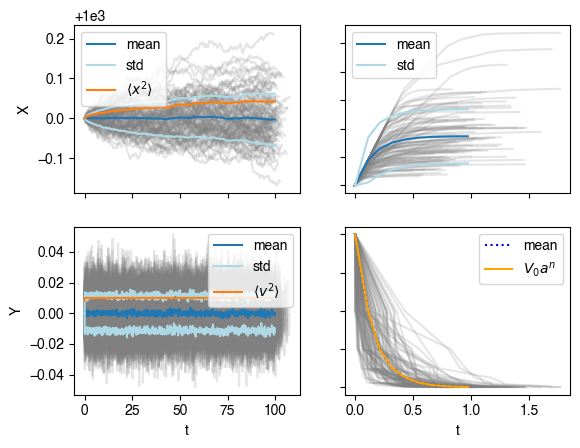

In [122]:
fig, axs = plt.subplots(2, 2, figsize=(6.4, 4.8))

axs[0, 0].plot(t, X, color='grey', alpha=0.2)
axs[0, 0].plot(t.mean(axis=1), X.mean(axis=1), label="mean")
axs[0, 0].plot(t.mean(axis=1), X.mean(axis=1) + X.std(axis=1), color='lightblue', label="std")
axs[0, 0].plot(t.mean(axis=1), X.mean(axis=1) - X.std(axis=1), color='lightblue')
axs[0, 0].plot(t.mean(axis=1), X.mean(axis=1) + np.sqrt(X2approx), label=r"$\langle x^2 \rangle$")

axs[1, 0].plot(t, V, color='grey', alpha=0.2)
axs[1, 0].plot(t.mean(axis=1), V.mean(axis=1), label="mean")
axs[1, 0].plot(t.mean(axis=1), V.mean(axis=1) + V.std(axis=1), color='lightblue', label="std")
axs[1, 0].plot(t.mean(axis=1), V.mean(axis=1) - V.std(axis=1), color='lightblue')
axs[1, 0].plot(t.mean(axis=1), np.sqrt(V2mean), label=r"$\langle v^2 \rangle$")

axs[0, 1].plot(tsmall, Xsmall, color='grey', alpha=0.2)
axs[0, 1].plot(tsmall.mean(axis=1), Xsmall.mean(axis=1), label="mean")
axs[0, 1].plot(tsmall.mean(axis=1), Xsmall.mean(axis=1) + Xsmall.std(axis=1), color='lightblue', label="std")
axs[0, 1].plot(tsmall.mean(axis=1), Xsmall.mean(axis=1) - Xsmall.std(axis=1), color='lightblue')

axs[1, 1].plot(tsmall, Vsmall, color='grey', alpha=0.2)
axs[1, 1].plot(tsmall.mean(axis=1), Vsmall.mean(axis=1), 'b:', label="mean")
#axs[1, 1].plot(tsmall.mean(axis=1), Vsmall.mean(axis=1) + Vsmall.std(axis=1), color='lightblue', label="std")
#axs[1, 1].plot(tsmall.mean(axis=1), Vsmall.mean(axis=1) - Vsmall.std(axis=1), color='lightblue')
axs[1, 1].plot(tsmall.mean(axis=1), [V0small * a**n for n in range(0, Nsmall)], color="orange", label=r"$V_0 a^n$")

axs[0, 0].set_ylabel("X")
axs[1, 0].set_ylabel("Y")
for ax in axs.flat:
    ax.set_xlabel("t")
    ax.legend()
    ax.label_outer()

plt.savefig("../results/Gillespiewalk.png", dpi=300)
plt.show()